In [1]:
#Reference
import numpy as np
import scipy as sp
from scipy.spatial import KDTree
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import math

import os
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Sampling from Guassian => Find P(0) (using KDE); The Model of 0 Vector
#d==dimension
d=4
mean = np.ones(d)

#Define Gaussian Class
class Gaussian:
    def __init__(self, covmat=(0.5)*np.diag(v=np.ones(len(mean)), k=0)):
        self.covmat = covmat        
    def evaluate(self, x, mean):
        cov = self.covmat
        inv_cov = np.linalg.inv(cov)
        if (np.linalg.det(2*np.pi*cov))**(-0.5) >= 0.0:
            return((2*np.pi*(np.linalg.det(cov)))**(-0.5) * np.exp(-0.5*(x-mean)@inv_cov@(x-mean)))
        else:
            print("Determinant of covariance matrix is not positive definite.")

#Sample Points from Gaussian
g = Gaussian()
mean = np.ones(d)
x=np.zeros(len(mean))
covariance = np.diag(v=np.ones(len(mean)), k=0)
samples = np.random.multivariate_normal(mean, covariance, size=1000)
P0 = 0
for m in samples:
    P0 += (1000)**(-1.0)*g.evaluate(x,mean)
   
print(samples)
print(P0)
print(len(mean))  #Check dim

'''Changing value of covmat class, aka smoothing parameter, is main control for P(0) value being so low. \n
    When I increase smoothing parameter, P(0) is higher (as expected), but 0.5 seems to be happy smoothing lol'''

[[ 3.40476195 -0.43338202  0.75508176 -0.27913022]
 [ 1.92253244  0.28104237  0.67606095 -0.77841812]
 [-0.63845415  0.37770419  0.92372803 -0.22178081]
 ...
 [ 0.77109212  1.23889243  2.18077117  1.37553433]
 [-0.42611985  1.20537295 -0.60099621  2.05140653]
 [ 1.47245219  0.18051349  1.60919988  2.02094288]]
0.02922753098112333
4


'Changing value of covmat class, aka smoothing parameter, is main control for P(0) value being so low.\n    When I increase smoothing parameter, P(0) is higher (as expected), but 0.5 seems to be happy smoothing lol'

In [3]:
#Check for P(0) analytically 


[0.11461812 0.         0.         0.         0.         0.
 0.         0.        ]
[0.11461812 0.05131358 0.         0.         0.         0.
 0.         0.        ]
[0.11461812 0.05131358 0.0443816  0.         0.         0.
 0.         0.        ]
[0.11461812 0.05131358 0.0443816  0.06386569 0.         0.
 0.         0.        ]
[0.11461812 0.05131358 0.0443816  0.06386569 0.07601915 0.
 0.         0.        ]
[0.11461812 0.05131358 0.0443816  0.06386569 0.07601915 0.05699191
 0.         0.        ]
[0.11461812 0.05131358 0.0443816  0.06386569 0.07601915 0.05699191
 0.04408392 0.        ]
[0.11461812 0.05131358 0.0443816  0.06386569 0.07601915 0.05699191
 0.04408392 0.04969482]


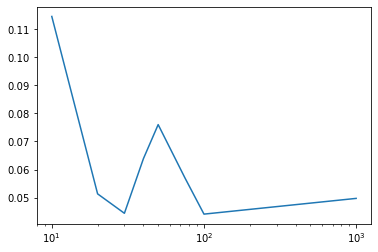

In [4]:
#Generate Random Samples, Used as a check
sample_length = [10, 20, 30, 40, 50, 75, 100, 1000]
pval = np.zeros(len(sample_length))
for i in range(len(sample_length)):
    length = sample_length[i]
    samples = np.random.multivariate_normal(mean, covariance, size=length)
    P=0
    for m in samples:
        P += (length)**(-1.0)*g.evaluate(x,m)
    
    pval[i] = P
    print(pval)

plt.plot(sample_length, pval)
plt.xscale('log')

In [5]:
#KD-Tree Time :O
#From sample lengths, find k+1 nearest neighbors with kdtree, k=100 nearest neighbors
kdtree = KDTree(samples)
query = kdtree.query(x=np.zeros(d), k=100)
#Query KD-Tree for nearest Neighbors
print(query)
index = query[1]
print(index)
data = kdtree.data[index]
#Get data points of the nearest neighbors
print(data)

(array([0.66930335, 0.68054653, 0.71584958, 0.72738739, 0.80424127,
       0.8451387 , 0.85530524, 0.86553965, 0.88382003, 0.91592782,
       0.94283175, 0.95258296, 0.97497089, 0.98450338, 1.00039671,
       1.00131649, 1.00155582, 1.0271804 , 1.03769777, 1.04156744,
       1.04631383, 1.06781801, 1.07081813, 1.07889534, 1.09289705,
       1.12055888, 1.12113555, 1.12739019, 1.12993424, 1.13695914,
       1.14059519, 1.15024607, 1.1531806 , 1.16087022, 1.16246815,
       1.16378845, 1.16454898, 1.1669817 , 1.17475646, 1.17495951,
       1.18093994, 1.18342379, 1.21500574, 1.21611865, 1.22902531,
       1.23277098, 1.25243233, 1.25640947, 1.27407938, 1.28160468,
       1.28371161, 1.28930036, 1.2929109 , 1.29573114, 1.31120836,
       1.31784902, 1.31895336, 1.31951846, 1.32302933, 1.33621179,
       1.34457802, 1.34571582, 1.34642605, 1.35124363, 1.35136562,
       1.35252497, 1.3896591 , 1.39035972, 1.39426356, 1.39570961,
       1.39596772, 1.39983462, 1.40137672, 1.40543959, 1.4114

In [6]:
#Gaussian Around Sampled Points

pvalsamples = np.zeros(len(samples))

#Pick one data point as modelled point, compare every other point to "modelled" point
for i in range(len(samples)):
    modpoint = samples[i]
    modquery = kdtree.query(modpoint, k=100)
    modindex = modquery[1]
    moddata = kdtree.data[modindex]
    print('\r' +str(i),end='')
    Pd = (1/1000)
    for j in range(len(moddata)):
        Pd += (1000)**(-1.0)*g.evaluate(moddata[j], modpoint)
        
    pvalsamples[i] = Pd #Pval of samples 

#print(len(data))
#print(data)

print(pvalsamples)

999[0.06508465 0.0144911  0.05117064 0.07833394 0.06208293 0.08408937
 0.05146047 0.06125628 0.07513245 0.06781253 0.07078007 0.03922073
 0.06749166 0.00676295 0.02253241 0.04033901 0.0733674  0.05522678
 0.01507064 0.0263349  0.00417465 0.00914553 0.05779137 0.07641043
 0.07401536 0.02531201 0.03937276 0.05651113 0.0346405  0.0758018
 0.04156969 0.07537408 0.02605172 0.03566518 0.03168936 0.02359635
 0.08401312 0.00995836 0.08151593 0.00671794 0.0322598  0.08739289
 0.05921747 0.07250007 0.02736818 0.06951258 0.00895708 0.01708793
 0.00757854 0.05344632 0.06964598 0.00845442 0.00690315 0.02560693
 0.08251267 0.03435356 0.0439339  0.03140557 0.02481591 0.06111815
 0.03606999 0.03961962 0.02285916 0.04827433 0.08563343 0.07740588
 0.01642075 0.04276278 0.02995561 0.0429176  0.06464536 0.04510966
 0.02345674 0.05548318 0.01431996 0.0202318  0.06856274 0.03528697
 0.07120793 0.02160937 0.08997802 0.0788443  0.03005395 0.01252937
 0.03151138 0.02214121 0.05142597 0.07803675 0.07907244 0.06

In [7]:
#Compare Values Pi to P0
#Want to count all points that satify (Pi > P0) for integration; save other points for later

Accept = []   #Accept Pi >= P0
Reject = []   #Reject because Pi < P0

for i in range(len(pvalsamples)):
    Pi = pvalsamples[i]
    if (Pi >= P0):
        print('Yeehaw!')
        Accept.append(Pi)
    else:
        print('Nope lol, you tried')
        Reject.append(Pi)

print(len(Accept))
print(len(Reject))

print(Accept)
print(Reject)  

Yeehaw!
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Nope lol, you tried
Nope lol, you tried
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Nope lol, you tried
Yeehaw!
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Nope lol, you tried
Nope lol, you tried
Nope lol, you tried
Yeehaw!
Yeehaw!
Nope lol, you tried
Nope lol, you tried
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Nope lol, you tried
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeehaw!
Yeehaw!
Yeehaw!
Nope lol, you tried
Yeeh

In [8]:
#Which Pi < P0 to accept b/c boundary point? Redemption time!
# k==Nearest Neighbors, if nearest neighbor number is too low, won't count points that are maybe important

NN= int(input('How many nearest neighbors?'))

Redemption = []
Death = []

for i in range(len(Reject)):
    Re = Reject[i]
    if (Re*(len(samples)- NN) >= P0):
        Redemption.append(Re)
    else:
        Death.append(Re)
        
print(len(Redemption), len(Death))
print(Redemption)

How many nearest neighbors?100
286 0
[0.014491102314815044, 0.006762953278845561, 0.022532413043710377, 0.015070644296056876, 0.02633489905474943, 0.004174650895561414, 0.009145529665504177, 0.02531200571210375, 0.026051720983042502, 0.023596347190241843, 0.009958356960102676, 0.006717939188012009, 0.027368183704454988, 0.008957075802821688, 0.01708793354741693, 0.0075785423574035865, 0.008454423425830526, 0.00690314667876354, 0.0256069277095748, 0.024815905735726052, 0.02285915774278674, 0.016420749683673214, 0.023456737578784605, 0.014319963127685987, 0.020231800323185004, 0.02160936622366982, 0.01252936521768721, 0.02214121400701132, 0.027868473773770882, 0.024404824435438212, 0.02023364881329746, 0.018700056589358086, 0.00293217222836499, 0.027717035168847624, 0.020718391172392887, 0.026953631692915238, 0.027609130011766108, 0.02275773125790997, 0.003323913570328595, 0.004353694361693754, 0.012146263399313288, 0.007049665794962044, 0.02462300102506011, 0.020751420406307914, 0.00732

In [23]:
#Redemption needs to be KDTree'd to find it's nearest nearest neighbors, but better than before

redemption = np.zeros(len(Redemption))

for i in range(len(samples)):
    re = Redemption[i]
    requery = kdtree.query(re, k=5*NN)
    reindex = requery[1]
    redata = kdtree.data[reindex]
    print('\r' +str(i),end='')
    reP = (1/1000)
    for j in range(len(redata)):
        reP += (1000)**(-1.0)*g.evaluate(redata[j], re)
        

redemption[i] = reP

IndexError: tuple index out of range